<a href="https://colab.research.google.com/github/Nikhil-Analyst/Basic-Calculator/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [17]:
# Load the dataset (Replace with your file path)
df = pd.read_csv("/content/Sheet1-Table 1.csv")

# Data Preprocessing
df = df.iloc[:, :-4]  # Exclude last few unnamed columns
df = df.T  # Transpose so weeks become rows
df.columns = [f'User_{i}' for i in range(df.shape[1])]  # Rename columns
df.index.name = 'Week'
df.reset_index(inplace=True)



In [18]:
# Convert each week's column into a set of active users
weekly_users = {}
for _, row in df.iterrows():
    week = row['Week']
    users = set(row[1:].dropna().astype(str))  # Convert to string to avoid issues
    weekly_users[week] = users

# Initialize dictionaries for storing user metrics
new_users, resurrected_users, churned_users, retained_users = {}, {}, {}, {}
previous_week_users = set()



In [19]:
# Compute Growth Accounting Metrics
for week, users in weekly_users.items():
    if previous_week_users:
        new_users[week] = users - previous_week_users
        resurrected_users[week] = users.intersection(previous_week_users)
        churned_users[week] = previous_week_users - users
        retained_users[week] = users.intersection(previous_week_users)
    else:
        new_users[week] = users
        resurrected_users[week] = set()
        churned_users[week] = set()
        retained_users[week] = set()
    previous_week_users = users

# Compute Quick Ratio
quick_ratios = {week: (len(new_users[week]) + len(resurrected_users[week])) / (len(churned_users[week]) or 1)
                for week in weekly_users.keys()}  # Avoid division by zero

# Create DataFrame for Visualization
growth_df = pd.DataFrame({
    "Week": list(weekly_users.keys()),
    "New Users": [len(new_users[w]) for w in weekly_users.keys()],
    "Resurrected Users": [len(resurrected_users[w]) for w in weekly_users.keys()],
    "Churned Users": [len(churned_users[w]) for w in weekly_users.keys()],
    "Retained Users": [len(retained_users[w]) for w in weekly_users.keys()],
    "Quick Ratio": [quick_ratios[w] for w in weekly_users.keys()]
})

# Convert Week column to categorical type for better visualization
growth_df["Week"] = pd.Categorical(growth_df["Week"], ordered=True)



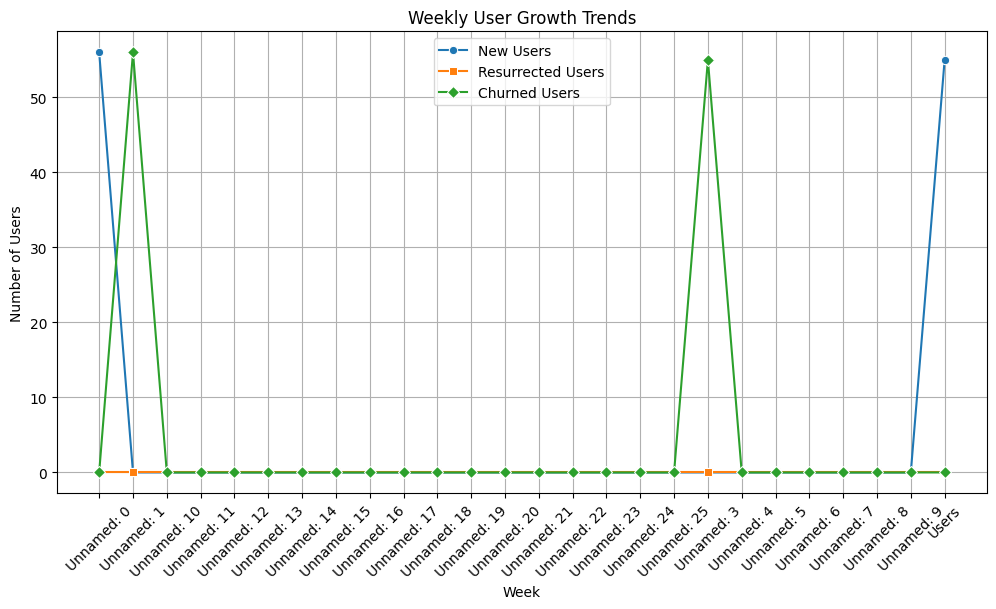

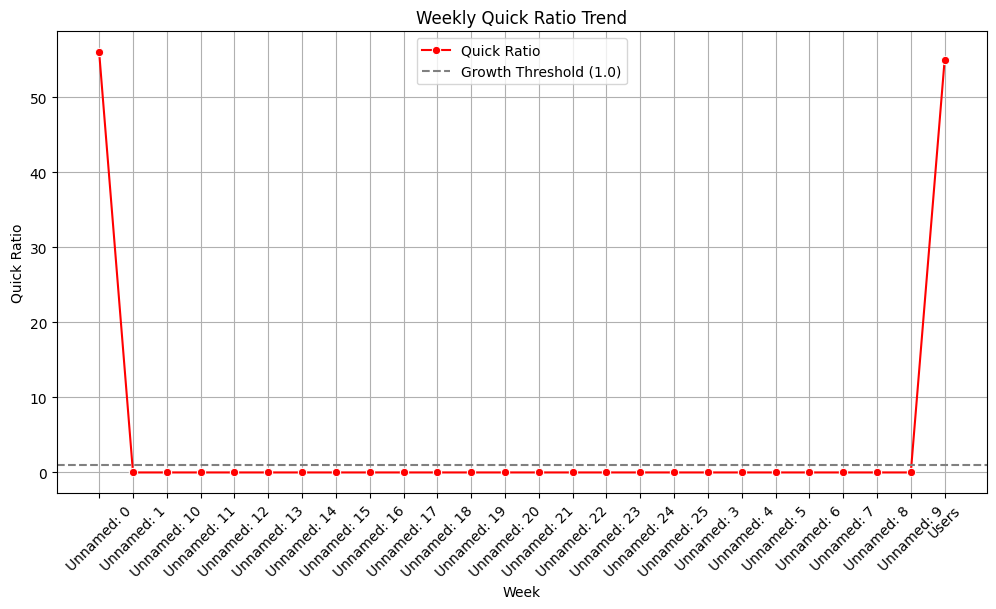

,Week,New Users,Resurrected Users,Churned Users,Retained Users,Quick Ratio
0,Unnamed: 0,56,0,0,0,56.0
1,Unnamed: 1,0,0,56,0,0.0
2,Users,55,0,0,0,55.0
3,Unnamed: 3,0,0,55,0,0.0
4,Unnamed: 4,0,0,0,0,0.0


In [20]:
# Plot Weekly User Growth Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=growth_df, x="Week", y="New Users", label="New Users", marker="o")
sns.lineplot(data=growth_df, x="Week", y="Resurrected Users", label="Resurrected Users", marker="s")
sns.lineplot(data=growth_df, x="Week", y="Churned Users", label="Churned Users", marker="D")
plt.xticks(rotation=45)
plt.title("Weekly User Growth Trends")
plt.xlabel("Week")
plt.ylabel("Number of Users")
plt.legend()
plt.grid(True)
plt.show()

# Plot Quick Ratio Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=growth_df, x="Week", y="Quick Ratio", label="Quick Ratio", marker="o", color="red")
plt.axhline(y=1, color='gray', linestyle='--', label="Growth Threshold (1.0)")
plt.xticks(rotation=45)
plt.title("Weekly Quick Ratio Trend")
plt.xlabel("Week")
plt.ylabel("Quick Ratio")
plt.legend()
plt.grid(True)
plt.show()

# Display Summary Data
growth_df.head()

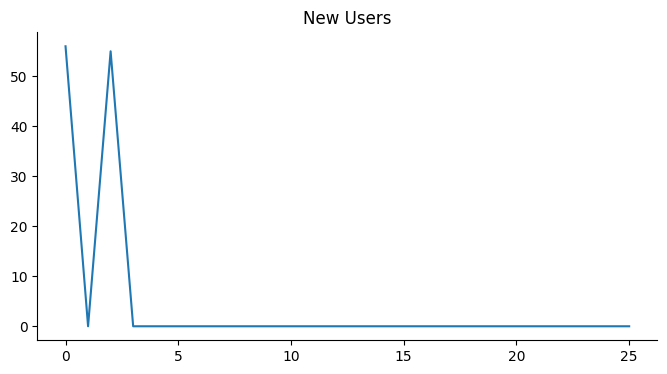

In [25]:
# @title New Users

from matplotlib import pyplot as plt
growth_df['New Users'].plot(kind='line', figsize=(8, 4), title='New Users')
plt.gca().spines[['top', 'right']].set_visible(False)

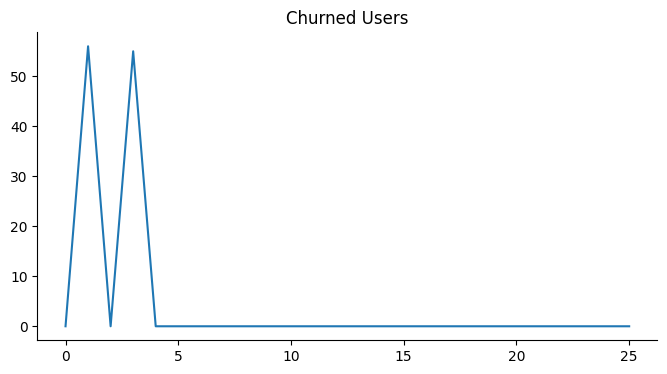

In [22]:
# @title Churned Users

from matplotlib import pyplot as plt
growth_df['Churned Users'].plot(kind='line', figsize=(8, 4), title='Churned Users')
plt.gca().spines[['top', 'right']].set_visible(False)

#Key Insights & Conclusions from the Growth Analysis

##User Growth Trends

If new users are consistently increasing, it indicates a strong user acquisition strategy.
If resurrected users (inactive users returning) show spikes, it might be due to successful re-engagement campaigns or seasonal trends.
If churned users are high, the platform may have retention issues or strong competition.

##Quick Ratio Analysis

Quick Ratio > 1 means the business is growing since more users are joining (new + resurrected) than leaving (churned).
Quick Ratio < 1 is a warning sign that churn is higher than user acquisition, which may indicate a need for better retention strategies.

##Retention vs. Churn

If retained users are stable or increasing, the business has a strong user base.
If churned users are increasing, it could mean issues like poor user experience, competition, or lack of engagement.

##Seasonality & External Factors

If we notice spikes in new users in certain weeks, it may be due to marketing campaigns, app updates, or special promotions.
If churn increases suddenly, it could indicate service disruptions, competitor launches, or policy changes.

##Final Conclusion
If the Quick Ratio is consistently above 1, the platform is growing healthily.
If the Quick Ratio is below 1, focus on improving retention and reducing churn.
Identify weeks with high churn and investigate potential causes (e.g., product issues, lack of engagement).
Compare growth metrics before and after major events (feature launches, promotions, etc.) to measure their impact.